# 賃貸価格（予測データセットセット）について

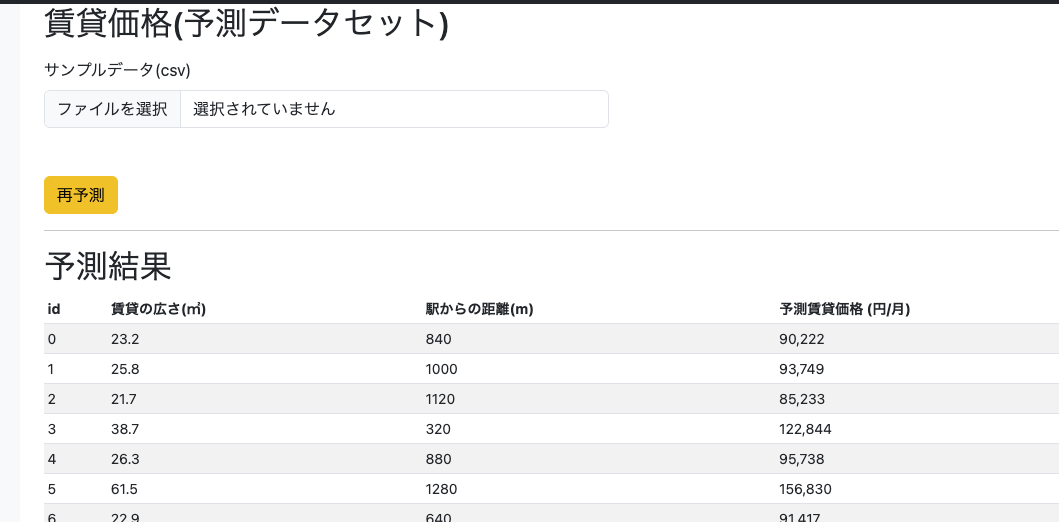

## 機能面に関して

### 【サンプルデータをセット】
- サンプルデータ(sample.csv):下記のテーブルに準じたCSVデータを挿入。


### 【予測ボタン：押下】
- サンプルデータのリストから１つずつ予測賃貸価格を算出
- 算出された結果を加えてリスト形式で表示

<hr>

## 賃貸価格（予測データセットセット）で用いたモデル


In [2]:
# モジュールのインポート
import math
import pandas as pd
# Ridge Regressionモデルクラスの読み込み
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
# scikit-learnの準備
from sklearn.model_selection import train_test_split
# 線形回帰で学習
from sklearn import linear_model

In [3]:
#サンプルデータの読み込みと観測
sample_df = pd.read_csv('./data/sample.csv', index_col=None)
sample_df.head()

,house_area,year_from_built,distance,built_date,balcony_area,house_structure,floor,total_floor
0,23.151888,17,840.0,2005-10-01,0.0,RC,5.0,8.0
1,25.782793,13,1000.0,2009-08-01,0.0,RC,5.0,7.0
2,21.659113,30,1120.0,1992-02-01,0.0,RC,3.0,12.0
3,38.683944,9,320.0,2013-09-01,0.0,RC,4.0,7.0
4,26.341485,31,880.0,1991-05-01,0.0,RC,3.0,10.0


In [5]:
sample_df.shape

(10, 8)

#### モデルの作成
- モデルの作成手順は以下を参照。
- [詳細:賃貸価格(モデルセット)で用いたモデル](./housing_model.ipynb)

In [6]:
#データの読み込みと観測
df = pd.read_csv('./data/train.csv')
df.head()
#特徴量と正解データの設定
## 使いたい特徴量
feature_cols = ['house_area','distance']
## 予測したい列
target_col = 'rent_price'
x = df[feature_cols]
y = df[target_col]
# 訓練データとテストデータに8:2で分割
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# モデル学習
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
#特徴量と正解データの設定
## 使いたい特徴量
feature_cols = ['house_area','distance']
## 予測したい列
target_col = 'rent_price'

sample_x = sample_df[feature_cols]

In [8]:
# 学習したモデルを用いて予想
sample_df['pred_rent_price'] = model.predict(sample_x)

In [9]:
sample_df[['house_area','distance','pred_rent_price']]

,house_area,distance,pred_rent_price
0,23.151888,840.0,90221.587690
1,25.782793,1000.0,93748.682655
2,21.659113,1120.0,85233.009181
3,38.683944,320.0,122844.286893
4,26.341485,880.0,95738.240724
5,61.474195,1280.0,156829.983133
6,22.924769,640.0,91417.165577
7,40.161172,760.0,122003.561257
8,27.643135,480.0,101343.749873
9,25.104197,1160.0,91217.358817
